# Normal distribution

### In this lab we'll investigate the probability distribution that is most central to statistics: the normal distribution. If we are confident that our data are nearly normal, that opens the door to many powerful statistical methods

## The data

### Here we'll be working with measurements of body dimensions. This data set contains measurements from 247 men and 260 women, most of whom were considered healthy young adults.

In [1]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import io
import requests

df_url = 'https://raw.githubusercontent.com/akmand/datasets/master/openintro/bdims.csv'
url_content = requests.get(df_url, verify=False).content
bdims = pd.read_csv(io.StringIO(url_content.decode('utf-8')))

In [3]:
pd.set_option('display.max_columns', None)
print(bdims.shape)
bdims.head()

(507, 25)


bia.di  bii.di  bit.di  che.de  che.di  elb.di  wri.di  kne.di  ank.di  \
0    42.9    26.0    31.5    17.7    28.0    13.1    10.4    18.8    14.1   
1    43.7    28.5    33.5    16.9    30.8    14.0    11.8    20.6    15.1   
2    40.1    28.2    33.3    20.9    31.7    13.9    10.9    19.7    14.1   
3    44.3    29.9    34.0    18.4    28.2    13.9    11.2    20.9    15.0   
4    42.5    29.9    34.0    21.5    29.4    15.2    11.6    20.7    14.9   

   sho.gi  che.gi  wai.gi  nav.gi  hip.gi  thi.gi  bic.gi  for.gi  kne.gi  \
0   106.2    89.5    71.5    74.5    93.5    51.5    32.5    26.0    34.5   
1   110.5    97.0    79.0    86.5    94.8    51.5    34.4    28.0    36.5   
2   115.1    97.5    83.2    82.9    95.0    57.3    33.4    28.8    37.0   
3   104.5    97.0    77.8    78.8    94.0    53.0    31.0    26.2    37.0   
4   107.5    97.5    80.0    82.5    98.5    55.4    32.0    28.4    37.7   

   cal.gi  ank.gi  wri.gi  age   wgt    hgt  sex  
0    36.5    23.5    16.5   21  65.6  174.0    1  
1    37.5    24.5    17.0   23  71.8  175.3    1  
2    37.3    21.9    16.9   28  80.7  193.5    1  
3    34.8    23.0    16.6   23  72.6  186.5    1  
4    38.6    24.4    18.0   22  78.8  187.2    1

### We'll be focusing on just three columns to get started: weight in kg (wgt), height in cm (hgt), and sex (1 indicates male, 0 indicates female).

### Since men and women tend to have different body dimensions, we will create two data sets.

In [4]:
mdims = bdims[bdims['sex'] == 1]
fdims = bdims[bdims['sex'] == 0]

## Exercise 1:Make a histogram of men's heights and a histogram of women's heights.

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['font.size'] = 12

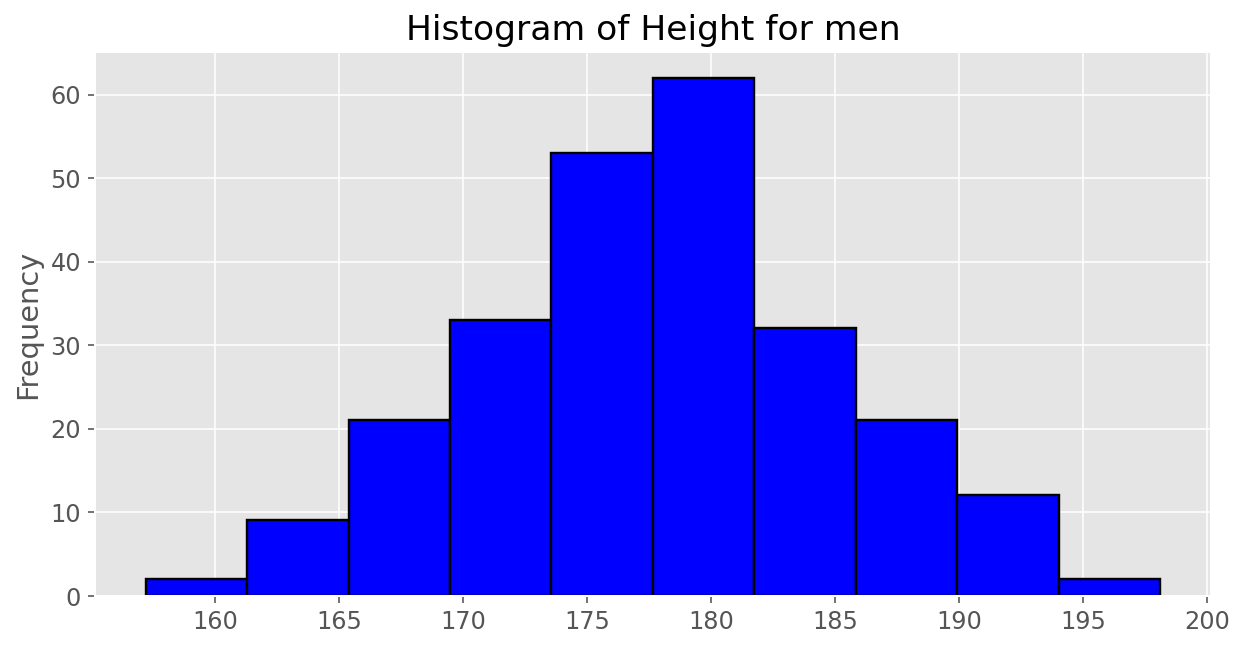

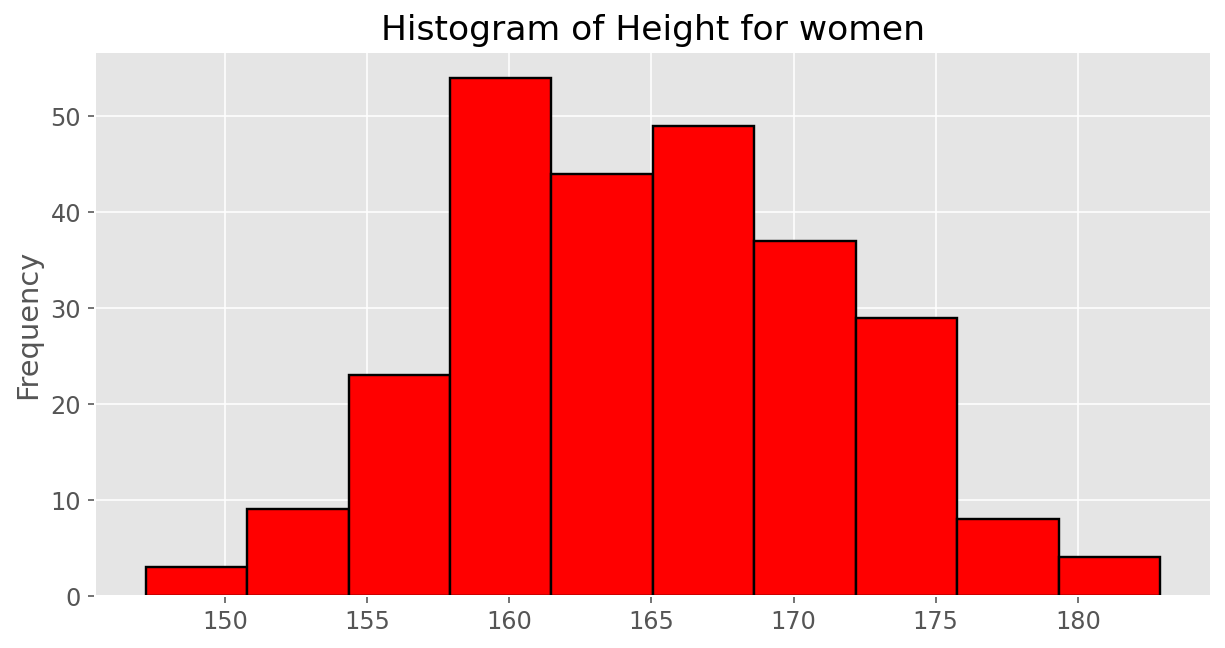

In [7]:
mdims['hgt'].plot(kind = 'hist', color = 'blue', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of Height for men')
plt.show();

fdims['hgt'].plot(kind = 'hist', color = 'red', edgecolor = 'black', 
                linewidth = 1.2, title = 'Histogram of Height for women')
plt.show();

### Let's see how close is the distribution of women's height to a normal distribution

In [8]:
fhgtmean = fdims['hgt'].mean()
fhgtsd = fdims['hgt'].std()

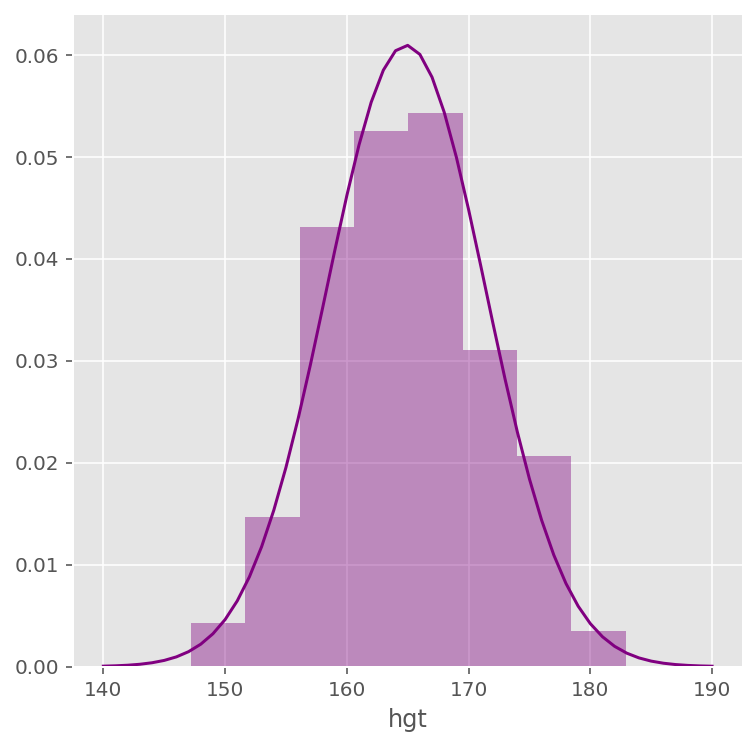

In [9]:
import seaborn as sns
from scipy.stats import norm
import matplotlib.pyplot as plt
%matplotlib inline 
plt.rcParams['figure.figsize'] = (6, 6)

fhgt_hist = sns.distplot(fdims['hgt'], norm_hist = True, kde = False, color = 'purple', bins = 8)
x = np.arange(140, 191)                                                  
y = norm.pdf(x, loc = fhgtmean, scale = fhgtsd)                                                         
fhgt_hist.plot(x, y, 'purple');

## Evaluating the normal distribution

### Eyeballing the shape of the histogram is one way to determine if the data appear to be nearly normally distributed. An alternative approach involves constructing a normal probability plot, also called a normal Q-Q plot.

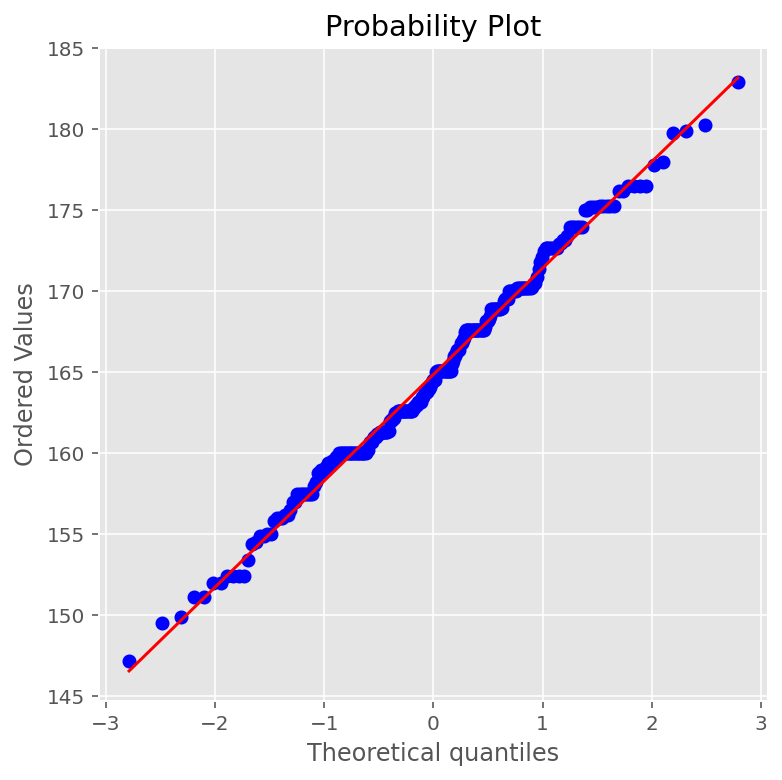

In [10]:
from scipy.stats import probplot
probplot(fdims['hgt'], plot = plt)
plt.show();

### We will compare the Q-Q plot of the real data to a random data which we know is normally distributed with the same mean and std.

In [11]:
sim_norm = np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd)

## Exercise 2: Create 8 random normally distributed data with mean=fhgtmean and std=fhgtst and plot them alongside the one of the real data.

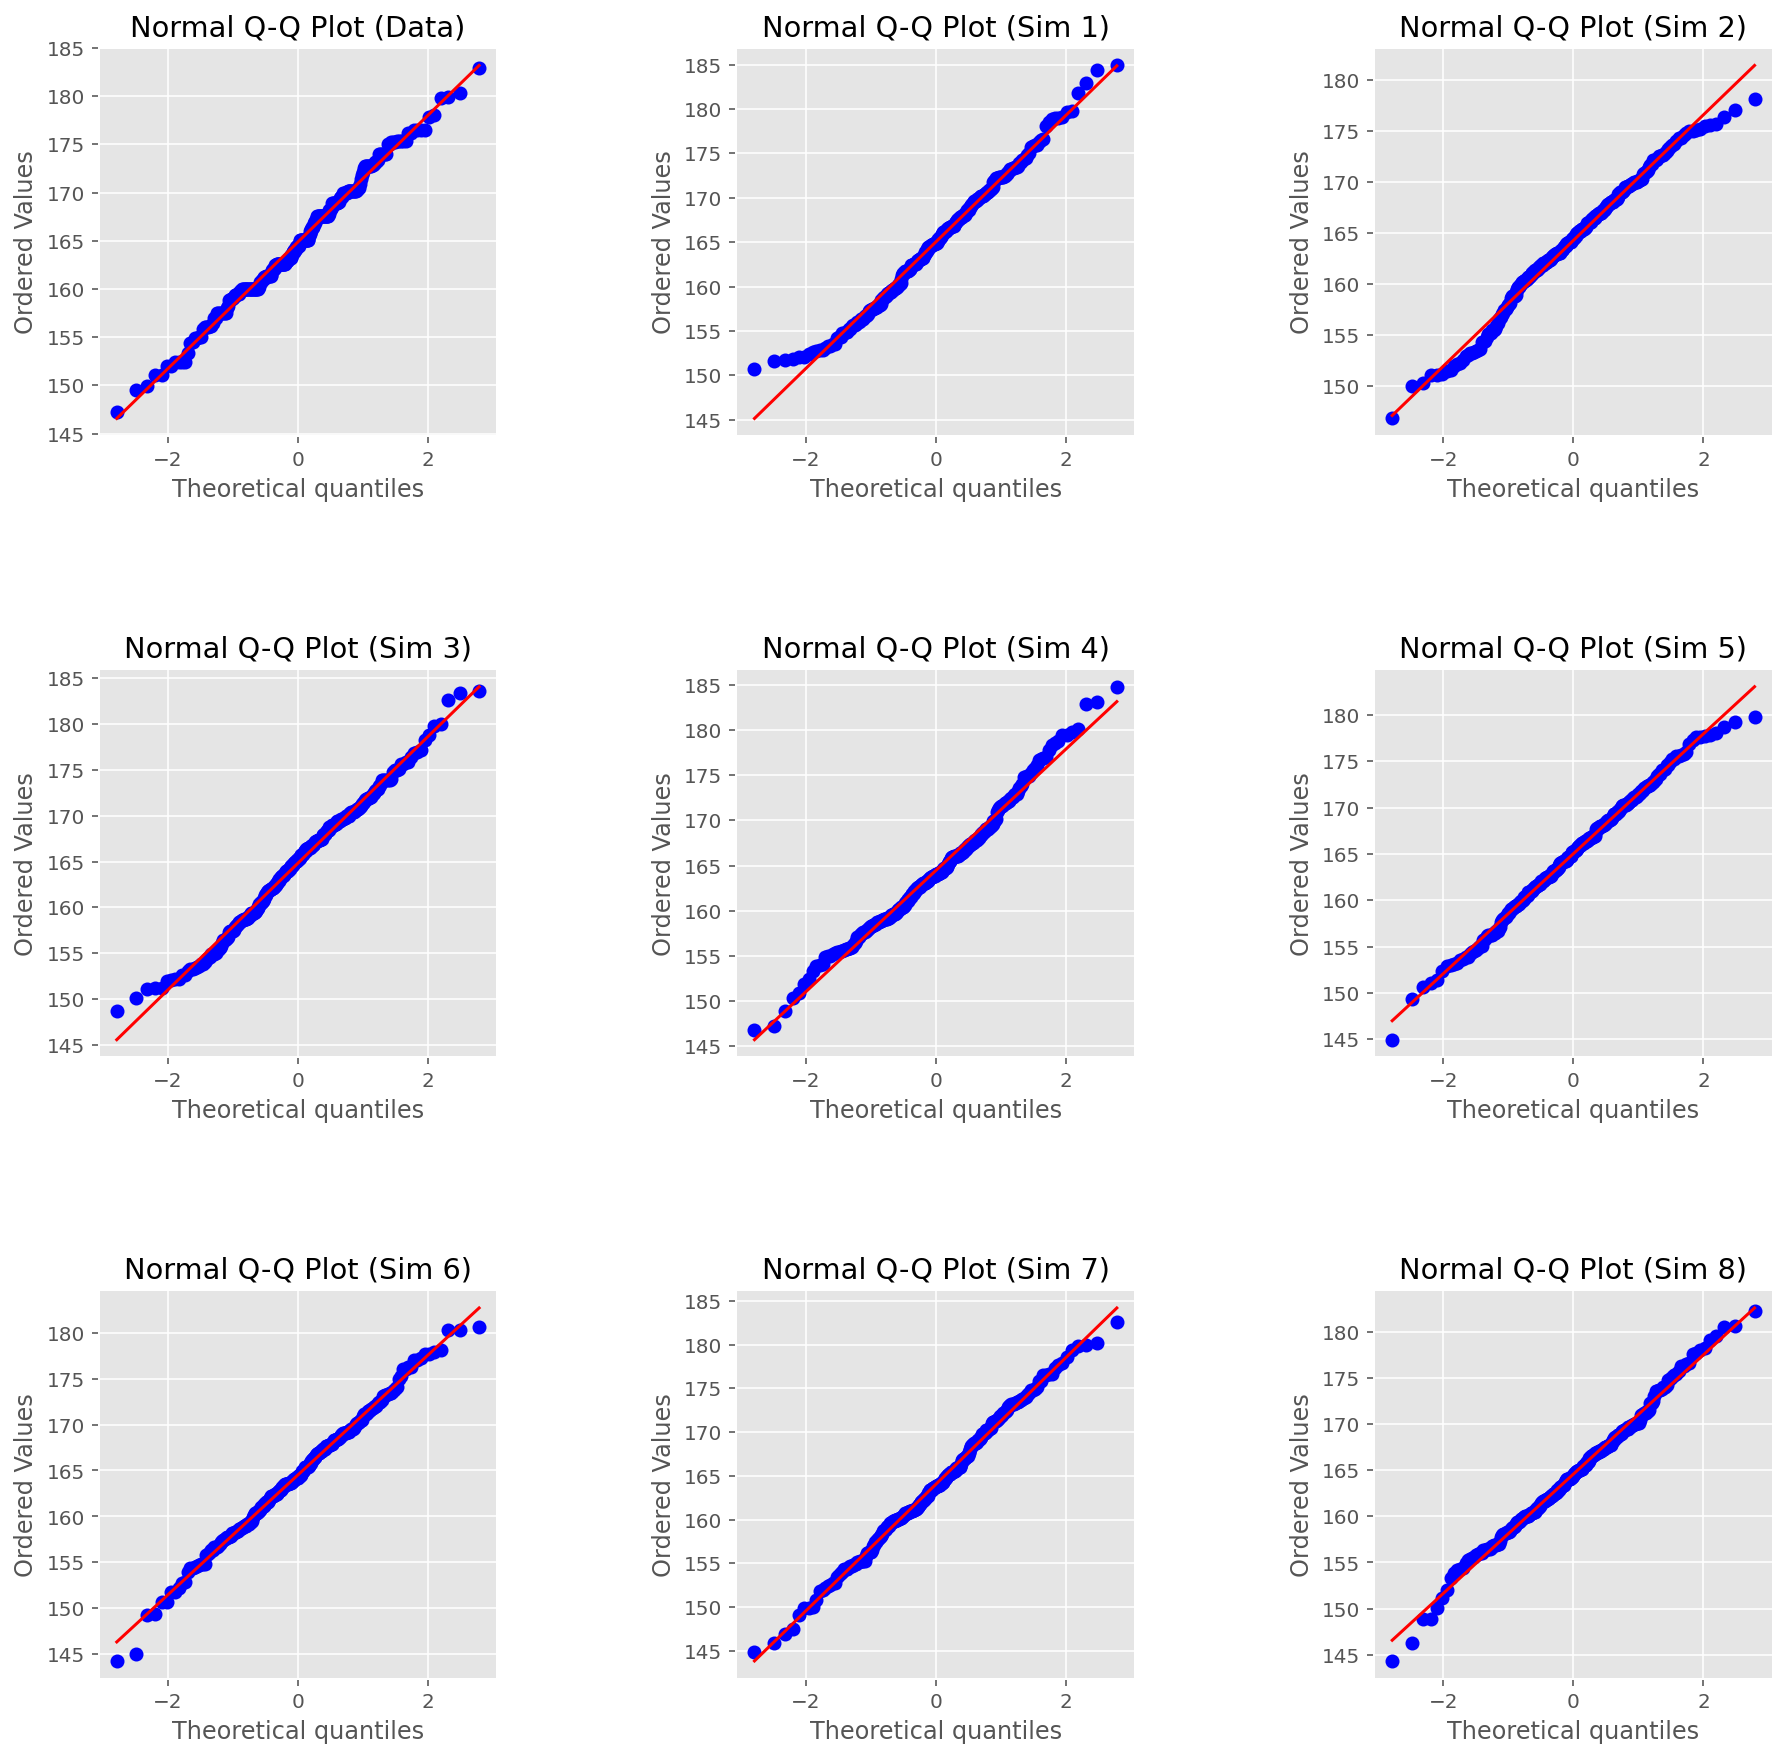

In [12]:
sim_norm_8 = []
for i in range(8):
    sim_norm_8.append(np.random.normal(size = len(fdims['hgt']), loc = fhgtmean, scale = fhgtsd))

# compare the original plot to nine plots generated from a normal distribution.
plt.rcParams['figure.figsize'] = (15, 15)
plt.tight_layout(pad = 1) # adjust the subplots to fit in to the figure area.
plt.subplots_adjust(hspace = 0.6, wspace = 0.6) # adjust the amount of width and height reserved for space between subplots.

plt.subplot(3, 3, 1)
probplot(fdims['hgt'], plot = plt)
plt.title('Normal Q-Q Plot (Data)')

plt.subplot(3, 3, 2)
probplot(sim_norm_8[0], plot = plt)
plt.title('Normal Q-Q Plot (Sim 1)')

plt.subplot(3, 3, 3)
probplot(sim_norm_8[1], plot = plt)
plt.title('Normal Q-Q Plot (Sim 2)')

plt.subplot(3, 3, 4)
probplot(sim_norm_8[2], plot = plt)
plt.title('Normal Q-Q Plot (Sim 3)')

plt.subplot(3, 3, 5)
probplot(sim_norm_8[3], plot = plt)
plt.title('Normal Q-Q Plot (Sim 4)')

plt.subplot(3, 3, 6)
probplot(sim_norm_8[4], plot = plt)
plt.title('Normal Q-Q Plot (Sim 5)')

plt.subplot(3, 3, 7)
probplot(sim_norm_8[5], plot = plt)
plt.title('Normal Q-Q Plot (Sim 6)')

plt.subplot(3, 3, 8)
probplot(sim_norm_8[6], plot = plt)
plt.title('Normal Q-Q Plot (Sim 7)')

plt.subplot(3, 3, 9)
probplot(sim_norm_8[7], plot = plt)
plt.title('Normal Q-Q Plot (Sim 8)')

plt.show();

## Exercise 3: Repeat the process for women's weight. Are they normally distributed?

## Normal probabilities

### If we assume that female heights are normally distributed (a very close approximation is also okay), we can find the probability that a randomly chosen young adult female is taller than 6 feet (about 182 cm) by calculating a Z score and consulting a Z table (also called a normal probability table).

In [13]:
from scipy.stats import norm

prob_using_Z = 1 - norm.cdf(182, loc = fhgtmean, scale = fhgtsd)
round(prob_using_Z,4)

0.0044

In [14]:
prob_empirically = (sum(fdims['hgt'] > 182) / len(fdims['hgt']))
round(prob_empirically, 4)

0.0038

## Exercise 4: We have 2 questions to answer.
## Q1: What is the probability that a randomly chosen young adult female is shorter than 165cm?
## Q2: What is the probability that a randomly chosen young adult female is heavier than 60kg?
## For each question calculate these probabilities theoretically (using Z) and empirically. Which variable, height or weight, had a closer agreement between the two methods?